In [ ]:
# 1.3. 데이터 시각화 - 주요 차트 내용 중 박스 플롯 hue 구현 예제 코드

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seaborn 내장 데이터셋 로드
tips = sns.load_dataset('tips')

# 데이터 준비
days = tips['day'].unique()
smokers = tips['smoker'].unique()

plt.figure(figsize=(8, 5))

# 각 day와 smoker 그룹별로 박스플롯 그리기
positions = []
data_to_plot = []
pos = 1

for day in sorted(days):  # day 순서대로
    for smoker in sorted(smokers):  # smoker = No, Yes
        group = tips[(tips['day'] == day) & (tips['smoker'] == smoker)]['total_bill']
        data_to_plot.append(group)
        positions.append(pos)
        pos += 1
    pos += 1  # day 사이 간격

# 박스플롯 그리기
bp = plt.boxplot(data_to_plot, positions=positions, widths=0.6, patch_artist=True)

# 색상 채우기 (smoker 구분)
colors = ['lightblue', 'lightcoral'] * len(days)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# x축 레이블: day 가운데 배치
xticks = []
xlabels = []
for i, day in enumerate(sorted(days)):
    xticks.append((i* (len(smokers)+1)) + 1.5)  # day 그룹의 중앙
    xlabels.append(day)

plt.xticks(xticks, xlabels)
plt.xlabel("day")
plt.ylabel("total_bill")
plt.title('Total Bill Distribution by Day and Smoker')

# 범례 추가
from matplotlib.patches import Patch
legend_handles = [Patch(color='lightblue', label='No'),
                  Patch(color='lightcoral', label='Yes')]
plt.legend(handles=legend_handles, title="smoker")

plt.show()

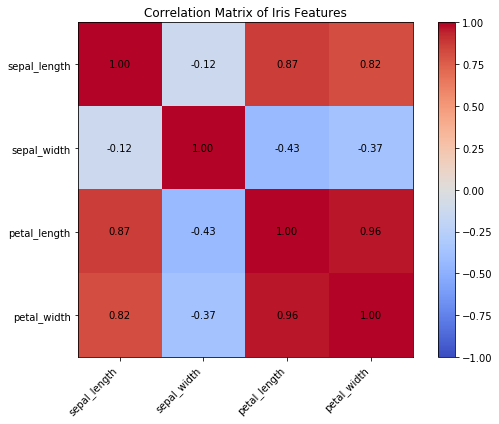

In [49]:
# 1.3. 데이터 시각화 - 주요 차트 내용 중 heatmap 예제 코드

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seaborn 내장 데이터셋 로드
iris = sns.load_dataset('iris')

# 수치형 변수 간 상관계수 계산
corr = iris.corr()

# 히트맵 그리기
fig, ax = plt.subplots(figsize=(8, 6))

# imshow로 색상 맵 시각화
cax = ax.imshow(corr.values, cmap='coolwarm', vmin=-1, vmax=1)

# 컬럼 이름으로 x, y축 라벨 설정
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)

# 각 셀에 상관계수 값 표시
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        ax.text(j, i, f"{corr.values[i, j]:.2f}", ha='center', va='center', color='black')

# 컬러바 추가
fig.colorbar(cax)

plt.title('Correlation Matrix of Iris Features')
plt.tight_layout()
plt.show()


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn 내장 'titanic' 데이터셋 사용
df = sns.load_dataset('titanic')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


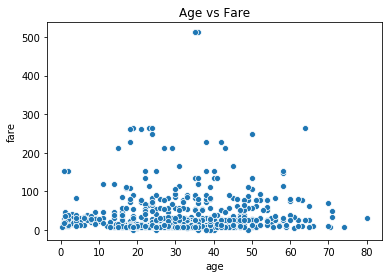

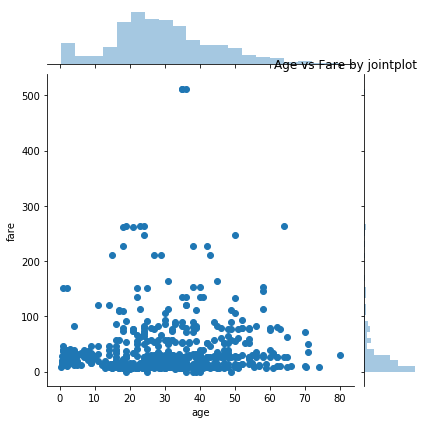

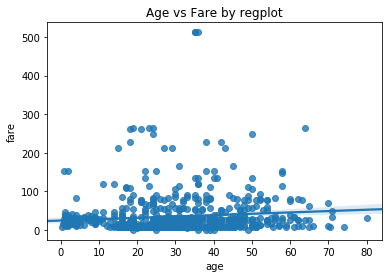

--- Correlation between Age and Fare ---
           age      fare
age   1.000000  0.096067
fare  0.096067  1.000000


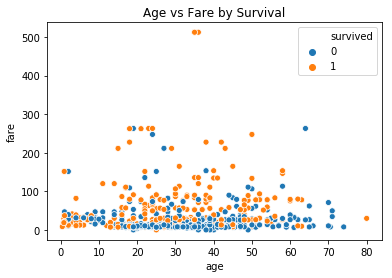

In [36]:
# 1-1. 산점도 (Scatter Plot)
sns.scatterplot(x='age', y='fare', data=df)
plt.title('Age vs Fare')
plt.show()

sns.jointplot(x='age', y='fare', data = df)
plt.title('Age vs Fare by jointplot')
plt.show()

sns.regplot(x='age', y='fare', data = df)
plt.title('Age vs Fare by regplot')
plt.show()

# 1-2. 상관 계수 (Correlation Coefficient)
correlation = df[['age', 'fare']].corr(method='pearson')
print("--- Correlation between Age and Fare ---")
print(correlation)

# 1-3. 다변량 분석: 산점도에 'survived' 변수 추가 (hue)
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title('Age vs Fare by Survival')
plt.show()

--- Correlation between Age and Fare ---
           age      fare
age   1.000000  0.096067
fare  0.096067  1.000000

--- Correlation between All Features ---
            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  


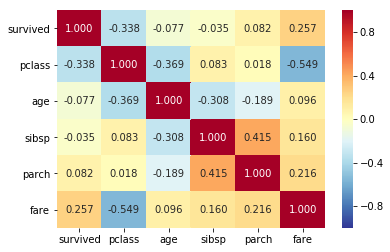

In [45]:
# 상관 계수 (Correlation Coefficient)
correlation = df[['age', 'fare']].corr(method='pearson')
print("--- Correlation between Age and Fare ---")
print(correlation)

# 전체 변수에 대한 상관 계수 출력
print("\n--- Correlation between All Features ---")
print(df.corr())
# 수치형 변수에 대한 상관 계수 출력
numeric_values = df.select_dtypes(include=["number"]).corr()
print("\n--- Correlation between Numerical Features ---")
print(numeric_values)

# 히트맵을 그려서 시각화 후 확인 가능
sns.heatmap(numeric_values,           # 상관계수 출력한 DataFrame
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.show()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [54]:
# age의 결측치 확인
print(df['age'].isna().sum())
# dropna 를 활용한 age에서 결측치 존재하는 행 제거
df_drop_na = df.dropna(subset=['age'])
# age의 결측치 재확인
print(df_drop_na['age'].isna().sum())

import scipy.stats as spst
# 상관계수와 p-value
spst.pearsonr(df_drop_na['age'], df_drop_na['fare'])
# (0.09606669176903893, 0.010216277504442105)

177
0


(0.09606669176903893, 0.010216277504442105)

In [56]:
# 혹은 결측치가 아닌 행만 선택하는 식으로 추출해 올 수도 있다.
df_drop_na = df.loc[df['age'].notnull()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  712 non-null    object  
 13  alive        714 non-null    object  
 14  alone        714 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 70.2+ KB


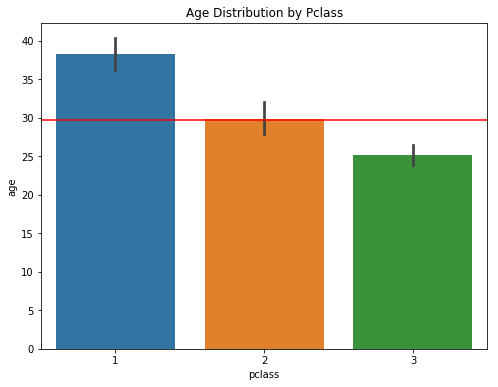

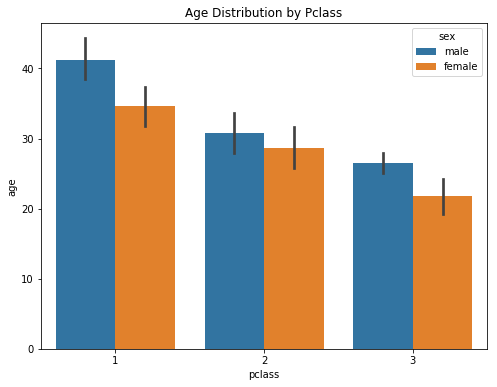

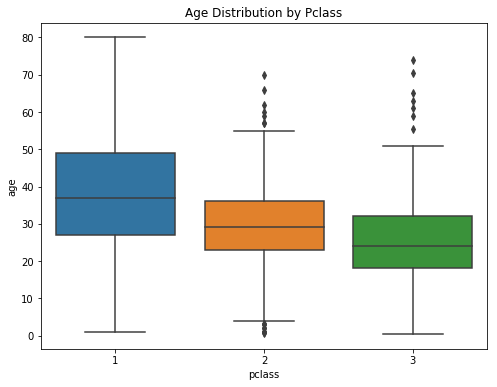

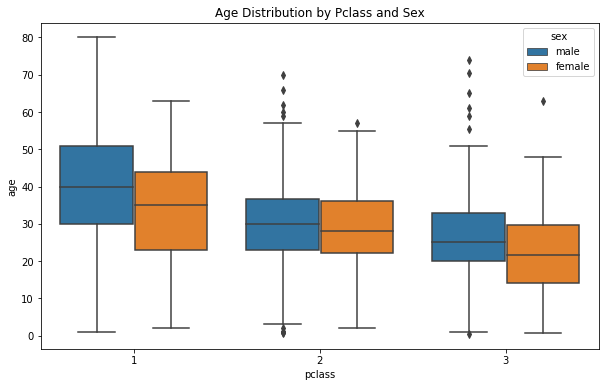

In [61]:
# 평균비교 막대 그래프 (Bar Plot)
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='age', data=df)
# age의 전체 평균 추가 (전체 평균과 각 범주별 평균 비교)
plt.axhline(df['age'].mean(), color = 'r')
plt.title('Age Distribution by Pclass')
plt.show()

# 다변량 분석: 막대 그래프에 'sex' 변수 추가 (hue)
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='age', hue='sex', data=df)
plt.title('Age Distribution by Pclass')
plt.show()

# 박스 플롯 (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='pclass', y='age', data=df)
plt.title('Age Distribution by Pclass')
plt.show()

# 다변량 분석: 박스 플롯에 'sex' 변수 추가 (hue)
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='age', hue='sex', data=df)
plt.title('Age Distribution by Pclass and Sex')
plt.show()

In [70]:
print("--- Age statistics by Survived ---")
print(df.groupby('survived')['age'].describe())

print("--- Age statistics by Pclass ---")
print(df.groupby('pclass')['age'].describe())

--- Age statistics by Survived ---
          count       mean        std   min   25%   50%   75%   max
survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0
--- Age statistics by Pclass ---
        count       mean        std   min   25%   50%   75%   max
pclass                                                           
1       186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0
2       173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0
3       355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0


In [68]:
# NaN 행 제외
temp = df.loc[df['age'].notnull()]
# 두 그룹으로 데이터 저장
died = temp.loc[temp['survived']==0, 'age']
survived = temp.loc[temp['survived']==1, 'age']

# scipy.stats로 t-test 진행
import scipy.stats as spst
spst.ttest_ind(died, survived)
# Ttest_indResult(statistic=2.06668694625381, pvalue=0.03912465401348249)

Ttest_indResult(statistic=2.06668694625381, pvalue=0.03912465401348249)

In [69]:
spst.ttest_ind(died, survived, equal_var=False)

Ttest_indResult(statistic=2.046030104393971, pvalue=0.041189651625866304)

In [71]:
import statsmodels.stats.weightstats as smw

test = smw.ttest_ind(died, survived, usevar='unequal')  # Welch’s t-test
print(test)


(2.046030104393971, 0.041189651625866325, 598.841215388818)


In [73]:
# NaN 행 제외
temp = df.loc[df['age'].notnull()]
# 그룹별 저장
P_1 = temp.loc[temp['pclass'] == 1, 'age']
P_2 = temp.loc[temp['pclass'] == 2, 'age']
P_3 = temp.loc[temp['pclass'] == 3, 'age']

# scipy.stats로  f 통계량 계산 진행
import scipy.stats as spst
spst.f_oneway(P_1, P_2, P_3)
# F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)

F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)

In [77]:
# 교차표 만들기
print(pd.crosstab(df['survived'], df['sex']))

# normalize 옵션을 넣으면 정규화한 값으로 출력 (columns, index, all)
print(pd.crosstab(df['survived'], df['sex'], normalize = 'index'))

sex       female  male
survived              
0             81   468
1            233   109
sex         female      male
survived                    
0         0.147541  0.852459
1         0.681287  0.318713


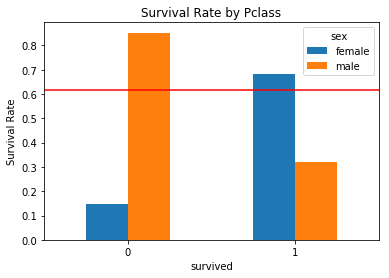

In [79]:
crosstab_ps_ratio = pd.crosstab(df['survived'], df['sex'], normalize = 'index')
# stacked=True 작성 필수
crosstab_ps_ratio.plot(kind='bar', stacked=False)
# 전체 평균선 추가
plt.axhline(1-df['survived'].mean(), color = 'r')
plt.title('Survival Rate by Pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

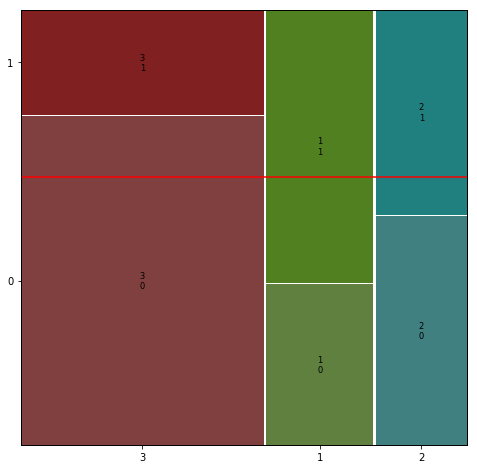

In [83]:
# 모자이크 플롯은 statsmodels에서 불러와야 한다.
from statsmodels.graphics.mosaicplot import mosaic

# Pclass별 생존여부를 mosaic plot으로 그리기
mosaic(df, [ 'pclass','survived'])

# 전체 평균선 추가
plt.axhline(1-df['survived'].mean(), color = 'r')

# 파일 내부 그래프 전체의 default 사이즈를 변경해주는 함수
plt.rcParams["figure.figsize"] = (12, 12)
# mosaic plot은 기존의 방식으로 그래프 크기 변경을 못하여 위와 같은 식으로 변경해야함

plt.show()

In [88]:
import scipy.stats as spst

# 1) 먼저 교차표 집계 (normalize 실행은 하면 안됨!!)
table = pd.crosstab(df['survived'], df['pclass'])

# 2) 카이제곱검정
print(spst.chi2_contingency(table))
'''
Chi2ContingencyResult(statistic=102.88898875696056,
                      pvalue=4.549251711298793e-23,
                      dof=2,
expected_freq=array([[133.09090909, 113.37373737, 302.53535354],
                     [ 82.90909091,  70.62626263, 188.46464646]]))
'''

(102.88898875696056, 4.549251711298793e-23, 2, array([[133.09090909, 113.37373737, 302.53535354],
       [ 82.90909091,  70.62626263, 188.46464646]]))


'\nChi2ContingencyResult(statistic=102.88898875696056,\n                      pvalue=4.549251711298793e-23,\n                      dof=2,\nexpected_freq=array([[133.09090909, 113.37373737, 302.53535354],\n                     [ 82.90909091,  70.62626263, 188.46464646]]))\n'

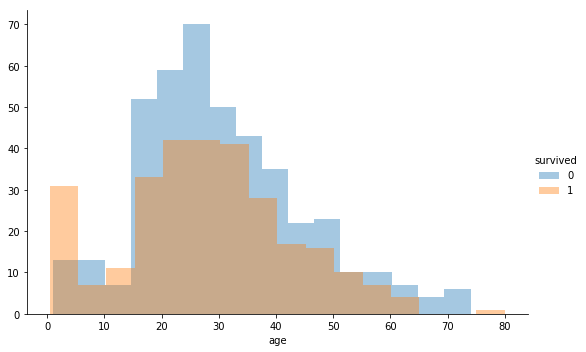

In [94]:
g = sns.FacetGrid(df, hue="survived", height=5, aspect=1.5)
g.map(sns.distplot, "age", hist=True, kde=False)
g.add_legend()
plt.show()

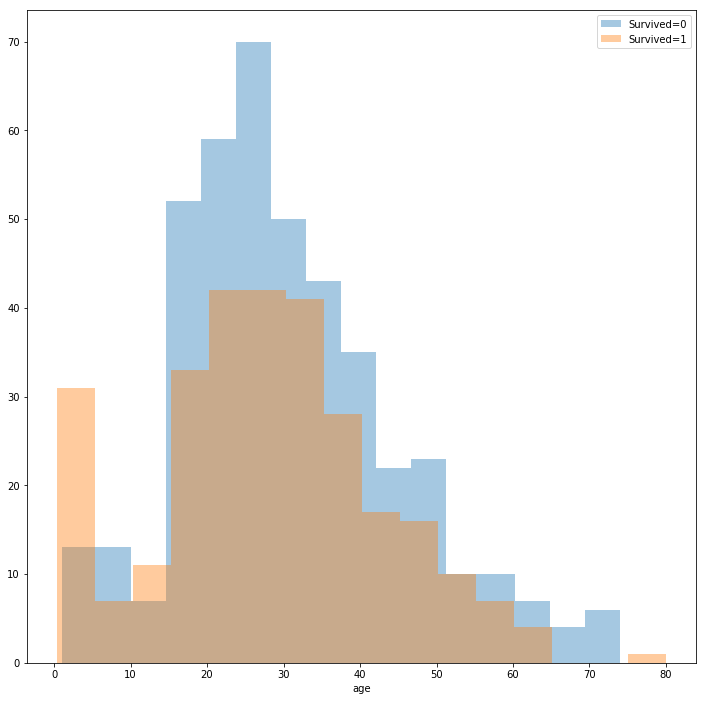

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치 제거
temp = df.loc[df['age'].notnull()]
# 반복문을 통해 생존 여부별 히스토그램 작성
for survived_value in [0, 1]:
    subset = temp[temp['survived'] == survived_value]
    sns.distplot(subset['age'], hist=True, kde=False, label=f"Survived={survived_value}")

plt.legend()
plt.show()

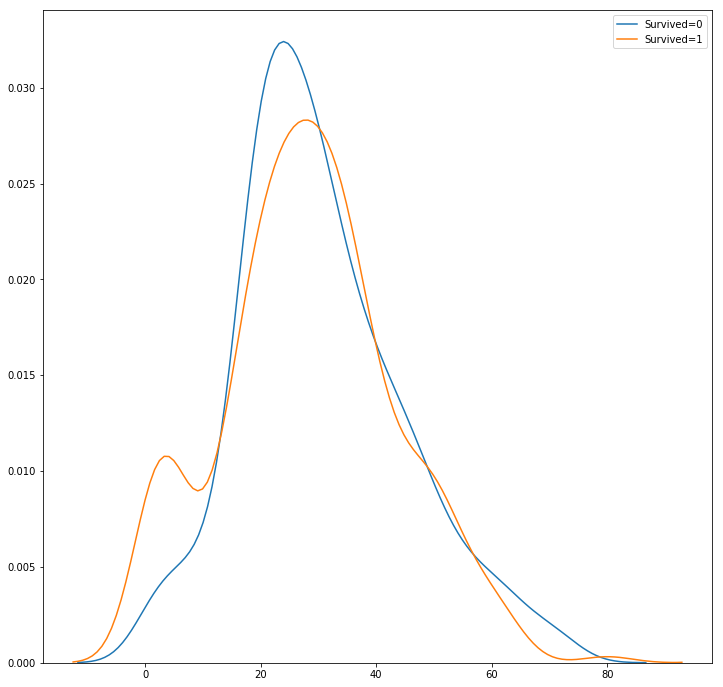

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

for label, group in df.groupby('survived'):
    sns.kdeplot(group['age'], label=f'Survived={label}')

plt.legend()
plt.show()